In [1]:
import Diagrams.Backend.Cairo.CmdLine

This diagram was inspired by the one at
[http://projecteuler.net/problem=395](http://projecteuler.net/problem=395),
which explains the algorithm for constructing the tree.



In [7]:
{-# LANGUAGE NoMonomorphismRestriction FlexibleContexts TypeFamilies #-}
import Diagrams.Prelude
import Diagrams.TwoD
import Data.Colour (blend)

An order $n$ tree has a square and a right-angled triangle on top, and
an order $n-1$ tree on each short side of the triangle.  As the
recursion deepens, the limbs get smaller and more transparent.

For aesthetics, let the leaves have circles instead of squares.



In [3]:
stops = mkStops [(saddlebrown, 0, 1), (peru, 0.5, 1), (saddlebrown, 1, 1)]
b = mkLinearGradient stops ((-0.5) ^& 0) (0.5 ^& 0) GradPad

In [4]:
stops' = mkStops [(green, 0, 1), (lightgreen, 1, 1)]
g = mkRadialGradient stops' (0.0 ^& 0) 0.5 (0.0 ^& 0.0) 1 GradPad

In [5]:
sky = mkLinearGradient (mkStops [(darkgreen,0,1), (white,0.1,1), (skyblue,1,1)])
                       (0 ^& (-2.5)) (0 ^& 3) GradPad

In [8]:
tree 1 = circle 1.25 # fillTexture g
                    # translate (r2 (0, 1/2)) # lwG 0
tree n =
  square 1          # translate (r2 (0, 1/2)) # fillTexture b
                    # lineTexture b # lw thin
  `atop` triangle   # translate (r2 (0,1))    # fillTexture b # lwG 0
  `atop` tree (n-1) # rotate (-asin 0.8 @@ rad)
                    # scale 0.6 # translate (r2 ( 0.32,1.24)) # fade
  `atop` tree (n-1) # rotate ( asin 0.6 @@ rad)
                    # scale 0.8 # translate (r2 (-0.18,1.24)) # fade
  where
    triangle = translate (r2 (-0.5,0)) . strokeLoop . closeLine
                 . fromVertices . map p2 $ [(0,0), (1,0), (0.8*0.8,0.8*0.6)]
    fade = opacity 0.95

colourise c = fc c . lc (blend 0.5 black c)

Draw the order 10 tree.



In [9]:
example = (tree 10 === square 1 # fillTexture b
                     # lineTexture b # lw thin) # center
                    <> (square 6.25 # fillTexture sky # lw none )

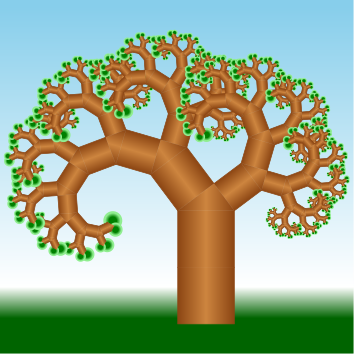

In [11]:
diagram example